In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error, make_scorer
import joblib
from joblib import load
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel("/home/nfernandez/unit/dataset_unidos.xlsx")
dataset

,proteina,id,atoms,bonds,dbonds,HBA1,HBA2,HBD,logP,MP,...,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,Binding_Affinity
0,CmedPBP4,1,14,14,3,1,1,0,0.6110,407.1765,...,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341,7.13
1,CpunPBP2,1,14,14,3,1,1,0,0.6110,407.1765,...,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615,10.06
2,CpunPBP5,1,14,14,3,1,1,0,0.6110,407.1765,...,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396,9.85
3,CsinGOBP1,1,14,14,3,1,1,0,0.6110,407.1765,...,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562,12.93
4,CsinGOBP2,1,14,14,3,1,1,0,0.6110,407.1765,...,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,CmedPBP4,252,8,7,0,2,1,1,0.3110,205.3128,...,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341,50.00
1454,CsinGOBP1,252,8,7,0,2,1,1,0.3110,205.3128,...,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562,30.00
1455,CsinGOBP2,252,8,7,0,2,1,1,0.3110,205.3128,...,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829,9.57
1456,CsinGOBP1,253,9,9,3,1,1,0,0.6558,249.5221,...,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562,24.11


In [3]:
dataset1 = dataset.drop(['proteina', 'id'
              #'AA Sequence W/O signal peptide',
              #'Compound Name'
              #'Compound_Protein'
              ], axis=1)
dataset1

,atoms,bonds,dbonds,HBA1,HBA2,HBD,logP,MP,MR_x,MW_x,...,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,Binding_Affinity
0,14,14,3,1,1,0,0.6110,407.1765,43.6530,172.13850,...,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341,7.13
1,14,14,3,1,1,0,0.6110,407.1765,43.6530,172.13850,...,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615,10.06
2,14,14,3,1,1,0,0.6110,407.1765,43.6530,172.13850,...,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396,9.85
3,14,14,3,1,1,0,0.6110,407.1765,43.6530,172.13850,...,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562,12.93
4,14,14,3,1,1,0,0.6110,407.1765,43.6530,172.13850,...,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,8,7,0,2,1,1,0.3110,205.3128,21.3938,89.07154,...,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341,50.00
1454,8,7,0,2,1,1,0.3110,205.3128,21.3938,89.07154,...,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562,30.00
1455,8,7,0,2,1,1,0.3110,205.3128,21.3938,89.07154,...,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829,9.57
1456,9,9,3,1,1,0,0.6558,249.5221,27.2990,112.08500,...,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562,24.11


In [4]:
descriptors_matrix = dataset1.iloc[:, :-1]

df_transform = dataset1.copy()
df_tranform = dataset1[['Binding_Affinity']]

X = descriptors_matrix
y = df_tranform['Binding_Affinity']

#dataset = merge_df.copy()
descriptors_matrix = dataset1.iloc[:, :-1]
#descriptors_matrix = descriptors_matrix.fillna(0) # transformar los NaN a 0
#descriptors_matrix = descriptors_matrix.loc[:, (descriptors_matrix != 0).any(axis=0)] # Eliminación de columnas con 0 en su totalidad

affinity_data = dataset1['Binding_Affinity']
descriptors_matrix.shape, affinity_data.shape

((1458, 3054), (1458,))

In [5]:
X = descriptors_matrix.values
y = affinity_data.values
X.shape, y.shape

((1458, 3054), (1458,))

In [6]:
from sklearn.model_selection import train_test_split

seed = 42  # Semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1166, 3054), (292, 3054), (1166,), (292,))

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_X_train = StandardScaler()
X_train = scaler_X_train.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train, columns=descriptors_matrix.columns)


scaler_X_test = StandardScaler()
X_test = scaler_X_test.fit_transform(X_test)
X_test_df = pd.DataFrame(X_test, columns=descriptors_matrix.columns)

X_train.shape, X_test.shape,

((1166, 3054), (292, 3054))

In [8]:
y_train = np.array([-np.log10(ki / 1e9) for ki in y_train])
y_train_df = pd.DataFrame(y_train, columns=['Affinity Train'])

y_test = np.array([-np.log10(ki / 1e9) for ki in y_test])
y_test_df = pd.DataFrame(y_test, columns=['Affinity Test'])

y_train.shape, y_test.shape

((1166,), (292,))

In [9]:
model = load('/home/nfernandez/unit/pkl_models/training - lightgbm.pkl')

y_pred = model.predict(X_test)


# RMSE
# rmse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE
mae = mean_absolute_error(y_test, y_pred)

# R²
r2 = r2_score(y_test, y_pred)

print("\t Test: ")
print(f"\nRMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

	 Test: 

RMSE: 0.29799102982541953
MAE: 0.22008241362305953
R²: 0.7101286159199577
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Prediction

In [10]:
# === 1. Filtrar proteína específica ===
proteina_objetivo = "LbotPBP1"
df_filtrado = dataset[dataset['proteina'] == proteina_objetivo].copy()

if df_filtrado.empty:
    raise ValueError(f"No se encontró la proteína '{proteina_objetivo}' en el dataset.")

# === 2. Preparar features ===
X_pred = df_filtrado.drop(columns=['Binding_Affinity', 'proteina', 'id'], errors='ignore')
X_pred_scaled = scaler_X_train.transform(X_pred)

# === 3. Realizar predicciones (modelo en log(Ki))
y_pred_log = model.predict(X_pred_scaled)
Ki_pred_uM = ((10 ** (-y_pred_log)*1000) * 1e6)

# === 5. Agregar las predicciones al dataframe
df_filtrado['Pred_logKi'] = y_pred_log
df_filtrado['Ki_pred_uM'] = Ki_pred_uM

print(f"Predicciones generadas para {proteina_objetivo}")
#print(f"Archivo guardado en: {output_path}")

# Mostrar algunas predicciones
df_filtrado[['proteina','id', 'Binding_Affinity', 'Pred_logKi', 'Ki_pred_uM']]

Predicciones generadas para LbotPBP1


,proteina,id,Binding_Affinity,Pred_logKi,Ki_pred_uM
120,LbotPBP1,5,23.3,7.632134,23.327388
152,LbotPBP1,7,42.2,7.376736,42.001444
180,LbotPBP1,8,391.1,6.493386,321.080673
250,LbotPBP1,11,29.5,7.527436,29.686823
388,LbotPBP1,20,40.7,7.387467,40.976361
466,LbotPBP1,27,86.5,7.060880,86.919977
601,LbotPBP1,38,16.2,7.794102,16.065653
739,LbotPBP1,57,7.2,8.144459,7.170358
832,LbotPBP1,71,9.8,8.008142,9.814272
1301,LbotPBP1,179,4.4,8.350966,4.456909


## Smina

In [14]:
import os

# Función para listar los archivos en una carpeta
def listar_rutas_archivos(ruta_carpeta):
    rutas_archivos = []
    for root, dirs, files in os.walk(ruta_carpeta):
        for archivo in files:
            rutas_archivos.append(os.path.join(root, archivo))
    return rutas_archivos

# Función para crear el DataFrame a partir de los archivos logs
def create_dataframe_log_from_path_list(rutasLogs):
    data_log = []

    # Expresión regular para extraer las columnas: mode, affinity, RMSD l.b., RMSD u.b.
    mode_pattern = re.compile(r'^\s*(\d+)\s+(-?\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')

    # Iterar sobre las rutas de los archivos log
    for log_path in rutasLogs:
        list_path = listar_rutas_archivos(log_path)

        for file_path in list_path:
            # Variables para almacenar datos
            modes = []
            affinities = []
            rmsd_lb = []
            rmsd_ub = []

            # Lectura del archivo línea por línea
            with open(file_path, 'r') as file:
                for line in file:
                    mode_match = mode_pattern.match(line)
                    if mode_match:
                        modes.append(int(mode_match.group(1)))
                        affinities.append(float(mode_match.group(2)))
                        rmsd_lb.append(float(mode_match.group(3)))
                        rmsd_ub.append(float(mode_match.group(4)))

            if modes and affinities and rmsd_lb and rmsd_ub:
                df = pd.DataFrame({
                    'Mode': modes,
                    'Affinity (kcal/mol)': affinities,
                    'RMSD l.b.': rmsd_lb,
                    'RMSD u.b.': rmsd_ub
                })

                # Transformar los datos en un formato apropiado y agregar el nombre del archivo
                transformed_data = {}
                for index, row in df.iterrows():
                    prefix = f"Fila {index + 1} - "
                    transformed_data[prefix + 'Mode'] = row['Mode']
                    transformed_data[prefix + 'Affinity (kcal/mol)'] = row['Affinity (kcal/mol)']
                    transformed_data[prefix + 'RMSD l.b.'] = row['RMSD l.b.']
                    transformed_data[prefix + 'RMSD u.b.'] = row['RMSD u.b.']

                # Obtener el nombre del ligando (nombre del archivo sin la extensión)
                ligand_name = os.path.splitext(os.path.basename(file_path))[0]
                df_transformed = pd.DataFrame(transformed_data, index=[0])
                df_transformed['Archivo'] = ligand_name
                df_transformed = pd.concat([df_transformed['Archivo'], df_transformed.drop('Archivo', axis=1)], axis=1)
                data_log.append(df_transformed)

    # Combinar todos los DataFrames en uno solo
    log_df = pd.concat(data_log, ignore_index=True)
    df_cleaned = log_df.dropna(how='all')

    return df_cleaned

# Ruta a la carpeta que contiene los archivos txt
carpeta_txt = '/home/nfernandez/unit/DockingLogs'  # Cambia esto por la ruta de tu carpeta

# Listar las rutas de los archivos logs
rutasLogs = [carpeta_txt]  # Si tienes más carpetas, agrégalas aquí

# Crear el DataFrame
df_final = create_dataframe_log_from_path_list(rutasLogs)
df_final['Archivo'] = df_final['Archivo'].str.replace('log_', '')
df_final['proteina'] = df_final['Archivo'].str.rsplit('_', n=1).str[-2]
df_final['id'] = df_final['Archivo'].str.rsplit('_', n=1).str[-1]
cols = list(df_final.columns)
cols.remove('proteina')
cols.remove('id')
cols.remove('Archivo')
df_final = df_final[['proteina', 'id'] + cols]
df_final = df_final.fillna(0)

# Guardar el DataFrame en un archivo xlsx
df_final.to_excel('dataset_extraido.xlsx', index=False)

# Mostrar el DataFrame
df_final

,proteina,id,Fila 1 - Mode,Fila 1 - Affinity (kcal/mol),Fila 1 - RMSD l.b.,Fila 1 - RMSD u.b.,Fila 2 - Mode,Fila 2 - Affinity (kcal/mol),Fila 2 - RMSD l.b.,Fila 2 - RMSD u.b.,...,Fila 48 - RMSD l.b.,Fila 48 - RMSD u.b.,Fila 49 - Mode,Fila 49 - Affinity (kcal/mol),Fila 49 - RMSD l.b.,Fila 49 - RMSD u.b.,Fila 50 - Mode,Fila 50 - Affinity (kcal/mol),Fila 50 - RMSD l.b.,Fila 50 - RMSD u.b.
0,SlitPBP1,55,1.0,-7.2,0.0,0.0,2.0,-7.1,1.081,4.706,...,3.247,4.544,49.0,-6.0,3.803,7.998,50.0,-6.0,2.860,3.788
1,SexiPBP2,195,1.0,-7.2,0.0,0.0,2.0,-7.2,1.293,3.186,...,5.576,9.155,49.0,-6.1,2.676,3.942,50.0,-6.1,5.997,9.166
2,AipsPBP1,113,1.0,-6.7,0.0,0.0,2.0,-6.6,1.553,2.897,...,3.901,6.539,49.0,-5.8,4.164,6.016,50.0,-5.8,4.635,6.176
3,SexiPBP1,78,1.0,-6.5,0.0,0.0,2.0,-6.3,1.632,3.181,...,2.856,6.316,49.0,-5.5,4.070,6.519,50.0,-5.5,2.978,5.257
4,HassPBP1,17,1.0,-5.3,0.0,0.0,2.0,-5.2,1.361,2.087,...,3.714,5.705,49.0,-4.5,4.728,7.087,50.0,-4.5,2.613,6.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,AipsGOBP2,15,1.0,-4.5,0.0,0.0,2.0,-4.5,1.038,1.329,...,4.635,5.672,49.0,-3.5,4.698,5.444,0.0,0.0,0.000,0.000
1454,CpinPBP2,48,1.0,-5.6,0.0,0.0,2.0,-5.6,1.191,1.601,...,3.346,4.699,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000
1455,LbotPBP1,27,1.0,-8.4,0.0,0.0,2.0,-8.4,0.872,1.671,...,2.913,6.643,49.0,-7.1,2.476,4.522,50.0,-7.1,1.927,6.583
1456,LbotPBP1,197,1.0,-6.7,0.0,0.0,2.0,-6.7,3.283,6.238,...,1.729,2.325,49.0,-5.8,2.630,5.562,50.0,-5.8,3.083,5.878


In [15]:
# Asumiendo que ya ejecutaste tu código anterior y tienes df_final
# Queremos quedarnos solo con la primera afinidad (modo 1)
df_final1 = df_final
# Seleccionamos las columnas relevantes
columnas_interes = ['proteina', 'id', 'Fila 1 - Affinity (kcal/mol)']

# Verificamos que la columna exista
for col in columnas_interes:
    if col not in df_final1.columns:
        raise KeyError(f"La columna {col} no existe en el DataFrame.")

# Filtramos solo esas columnas
df_filtrado1 = df_final[columnas_interes].copy()

# Renombramos la columna para mayor claridad
df_filtrado1 = df_filtrado1.rename(columns={'Fila 1 - Affinity (kcal/mol)': 'Affinity (kcal/mol)'})
#df_filtrado1['Affinity (kcal/mol)'] = df_filtrado1['Affinity (kcal/mol)']*-1

display(df_filtrado1)

,proteina,id,Affinity (kcal/mol)
0,SlitPBP1,55,-7.2
1,SexiPBP2,195,-7.2
2,AipsPBP1,113,-6.7
3,SexiPBP1,78,-6.5
4,HassPBP1,17,-5.3
...,...,...,...
1453,AipsGOBP2,15,-4.5
1454,CpinPBP2,48,-5.6
1455,LbotPBP1,27,-8.4
1456,LbotPBP1,197,-6.7


In [16]:
# === 1. Función: ΔG (kcal/mol) → Ki (µM) ===
def deltaG_to_Ki(deltaG, T=298.15):
    """
    Convierte energía libre de Gibbs (ΔG, en kcal/mol)
    a constante de inhibición (Ki) en micromolar (µM),
    usando la ecuación clásica ΔG = RT ln(Ki).
    """
    R = 1.987  # cal/(mol*K)
    deltaG_cal = deltaG*1000  # convertir kcal/mol → cal/mol
    Ki_M = np.exp(deltaG_cal / (R * T))  # Ki en M
    Ki_uM = Ki_M * 1e6  # convertir M → µM
    return Ki_uM

# === 2. Aplicar la función al dataframe ===
col_dg = "Affinity (kcal/mol)"  # columna con ΔG
df_filtrado1[col_dg] = pd.to_numeric(df_filtrado1[col_dg], errors="coerce")

df_filtrado1["Ki_uM"] = deltaG_to_Ki(df_filtrado1[col_dg])
df_filtrado1["Ki_uM"] = df_filtrado1["Ki_uM"].round(1)

# === 3. Mostrar resultados ===
display(df_filtrado1[[col_dg, "Ki_uM"]].head(10))

,Affinity (kcal/mol),Ki_uM
0,-7.2,5.3
1,-7.2,5.3
2,-6.7,12.3
3,-6.5,17.2
4,-5.3,130.2
5,-5.9,47.3
6,-5.6,78.5
7,-7.5,3.2
8,-6.4,20.3
9,-7.3,4.5


In [17]:
df_LbotPBP1 = df_filtrado[df_filtrado['proteina'] == 'LbotPBP1']
display(df_LbotPBP1)

,proteina,id,atoms,bonds,dbonds,HBA1,HBA2,HBD,logP,MP,...,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,Binding_Affinity,Pred_logKi,Ki_pred_uM
120,LbotPBP1,5,7,6,2,1,1,0,0.0094,202.1541,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,23.3,7.632134,23.327388
152,LbotPBP1,7,10,9,2,2,2,0,0.0698,251.3088,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,42.2,7.376736,42.001444
180,LbotPBP1,8,15,16,2,0,0,0,1.2858,489.1062,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,391.1,6.493386,321.080673
250,LbotPBP1,11,12,12,4,4,3,1,0.2261,220.7512,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,29.5,7.527436,29.686823
388,LbotPBP1,20,10,10,2,0,0,0,0.9606,311.6304,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,40.7,7.387467,40.976361
466,LbotPBP1,27,15,14,4,0,0,0,1.4409,467.4456,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,86.5,7.060880,86.919977
601,LbotPBP1,38,18,17,0,2,1,1,1.1240,547.5008,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,16.2,7.794102,16.065653
739,LbotPBP1,57,18,17,2,2,2,0,0.7202,525.0592,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,7.2,8.144459,7.170358
832,LbotPBP1,71,20,19,2,2,2,0,0.8828,593.4968,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,9.8,8.008142,9.814272
1301,LbotPBP1,179,20,19,0,2,1,1,1.2866,615.9384,...,0.02902,0.026075,0.029873,0.031522,0.028853,0.030992,0.029858,4.4,8.350966,4.456909


In [19]:
#Especificamos columnas
df_filtrado = df_filtrado[['proteina','id','Binding_Affinity' ,'Pred_logKi', 'Ki_pred_uM']]
display(df_filtrado)

,proteina,id,Binding_Affinity,Pred_logKi,Ki_pred_uM
120,LbotPBP1,5,23.3,7.632134,23.327388
152,LbotPBP1,7,42.2,7.376736,42.001444
180,LbotPBP1,8,391.1,6.493386,321.080673
250,LbotPBP1,11,29.5,7.527436,29.686823
388,LbotPBP1,20,40.7,7.387467,40.976361
466,LbotPBP1,27,86.5,7.060880,86.919977
601,LbotPBP1,38,16.2,7.794102,16.065653
739,LbotPBP1,57,7.2,8.144459,7.170358
832,LbotPBP1,71,9.8,8.008142,9.814272
1301,LbotPBP1,179,4.4,8.350966,4.456909


In [20]:
df_filtrado1['id'] = df_filtrado1['id'].astype(df_filtrado['id'].dtype)

merged_df = pd.merge(df_filtrado, df_filtrado1, on=['proteina', 'id'], how='inner')
# Seleccionamos las columnas relevantes
# merged_df = ['proteina', 'id', 'Fila 1 - Affinity (kcal/mol)'] # Remove this line

# Verificamos que la columna exista
columnas_interes = ['proteina', 'id', 'Affinity (kcal/mol)'] # Use the new column name
for col in columnas_interes:
    if col not in merged_df.columns:
        raise KeyError(f"La columna {col} no existe en el DataFrame.")

# Display the merged DataFrame
display(merged_df)

,proteina,id,Binding_Affinity,Pred_logKi,Ki_pred_uM,Affinity (kcal/mol),Ki_uM
0,LbotPBP1,5,23.3,7.632134,23.327388,-4.9,255.8
1,LbotPBP1,7,42.2,7.376736,42.001444,-5.7,66.3
2,LbotPBP1,8,391.1,6.493386,321.080673,-9.8,0.1
3,LbotPBP1,11,29.5,7.527436,29.686823,-6.8,10.4
4,LbotPBP1,20,40.7,7.387467,40.976361,-7.7,2.3
5,LbotPBP1,27,86.5,7.060880,86.919977,-8.4,0.7
6,LbotPBP1,38,16.2,7.794102,16.065653,-7.2,5.3
7,LbotPBP1,57,7.2,8.144459,7.170358,-7.6,2.7
8,LbotPBP1,71,9.8,8.008142,9.814272,-7.5,3.2
9,LbotPBP1,179,4.4,8.350966,4.456909,-7.6,2.7


In [21]:
# Redondear columnas específicas a una décima
cols_a_redondear = [
    "Binding_Affinity",
    "Pred_logKi",
    "Ki_pred_uM",
    "Affinity (kcal/mol)",
    "Ki_nM"
]

for c in cols_a_redondear:
    if c in merged_df.columns:
        merged_df[c] = merged_df[c].astype(float).round(1)

# Mostrar primeras fila
merged_df

,proteina,id,Binding_Affinity,Pred_logKi,Ki_pred_uM,Affinity (kcal/mol),Ki_uM
0,LbotPBP1,5,23.3,7.6,23.3,-4.9,255.8
1,LbotPBP1,7,42.2,7.4,42.0,-5.7,66.3
2,LbotPBP1,8,391.1,6.5,321.1,-9.8,0.1
3,LbotPBP1,11,29.5,7.5,29.7,-6.8,10.4
4,LbotPBP1,20,40.7,7.4,41.0,-7.7,2.3
5,LbotPBP1,27,86.5,7.1,86.9,-8.4,0.7
6,LbotPBP1,38,16.2,7.8,16.1,-7.2,5.3
7,LbotPBP1,57,7.2,8.1,7.2,-7.6,2.7
8,LbotPBP1,71,9.8,8.0,9.8,-7.5,3.2
9,LbotPBP1,179,4.4,8.4,4.5,-7.6,2.7


In [22]:
df_compounds=pd.read_excel('/home/nfernandez/dataset_extraido1.xlsx')
df_compounds

,Compound name,Protein,Binding_Affinity,Smiles,id
0,ionone (beta),CmedPBP4,7.13,CC(=O)/C=C/C1=C(C)CCCC1(C)C,1
1,ionone (beta),CpunPBP2,10.06,CC(=O)/C=C/C1=C(C)CCCC1(C)C,1
2,ionone (beta),CpunPBP5,9.85,CC(=O)/C=C/C1=C(C)CCCC1(C)C,1
3,ionone (beta),CsinGOBP1,12.93,CC(=O)/C=C/C1=C(C)CCCC1(C)C,1
4,ionone (beta),CsinGOBP2,30.00,CC(=O)/C=C/C1=C(C)CCCC1(C)C,1
...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,30.00,CCC(O)C(C)C,252
1455,2-methyl-3-pentanol,CsinGOBP2,9.57,CCC(O)C(C)C,252
1456,Methyl benzyl ether,CsinGOBP1,24.11,COCc1ccccc1,253
1457,Methyl benzyl ether,CsinGOBP2,30.00,COCc1ccccc1,253


In [23]:
df_unique = df_compounds.drop_duplicates(subset="id", keep="first")

# Hacer el merge de nuevo
merged_df = merged_df.merge(
    df_unique[["id", "Compound name"]],
    on="id",
    how="left"
)

# Mostrar para verificar
print(f"Filas después del merge: {len(merged_df)}")
merged_df

Filas después del merge: 16


,proteina,id,Binding_Affinity,Pred_logKi,Ki_pred_uM,Affinity (kcal/mol),Ki_uM,Compound name
0,LbotPBP1,5,23.3,7.6,23.3,-4.9,255.8,(E)-2-Hexenal
1,LbotPBP1,7,42.2,7.4,42.0,-5.7,66.3,Cis-3-Hexenyl acetate
2,LbotPBP1,8,391.1,6.5,321.1,-9.8,0.1,β‐caryophyllene / caryophyllene / beta-caryop...
3,LbotPBP1,11,29.5,7.5,29.7,-6.8,10.4,methyl salicylate
4,LbotPBP1,20,40.7,7.4,41.0,-7.7,2.3,r-limonene / (R)-(+)-limonene
5,LbotPBP1,27,86.5,7.1,86.9,-8.4,0.7,beta-farnesene / (E)-β-farnesene / trans-β-fa...
6,LbotPBP1,38,16.2,7.8,16.1,-7.2,5.3,1-hexadecanol / 16:OH
7,LbotPBP1,57,7.2,8.1,7.2,-7.6,2.7,(Z)-9-Tetradecenyl acetate / Z9-14:Ac
8,LbotPBP1,71,9.8,8.0,9.8,-7.5,3.2,(Z)-9-Hexadecenyl acetate / Z9-16:Ac
9,LbotPBP1,179,4.4,8.4,4.5,-7.6,2.7,octadecanol


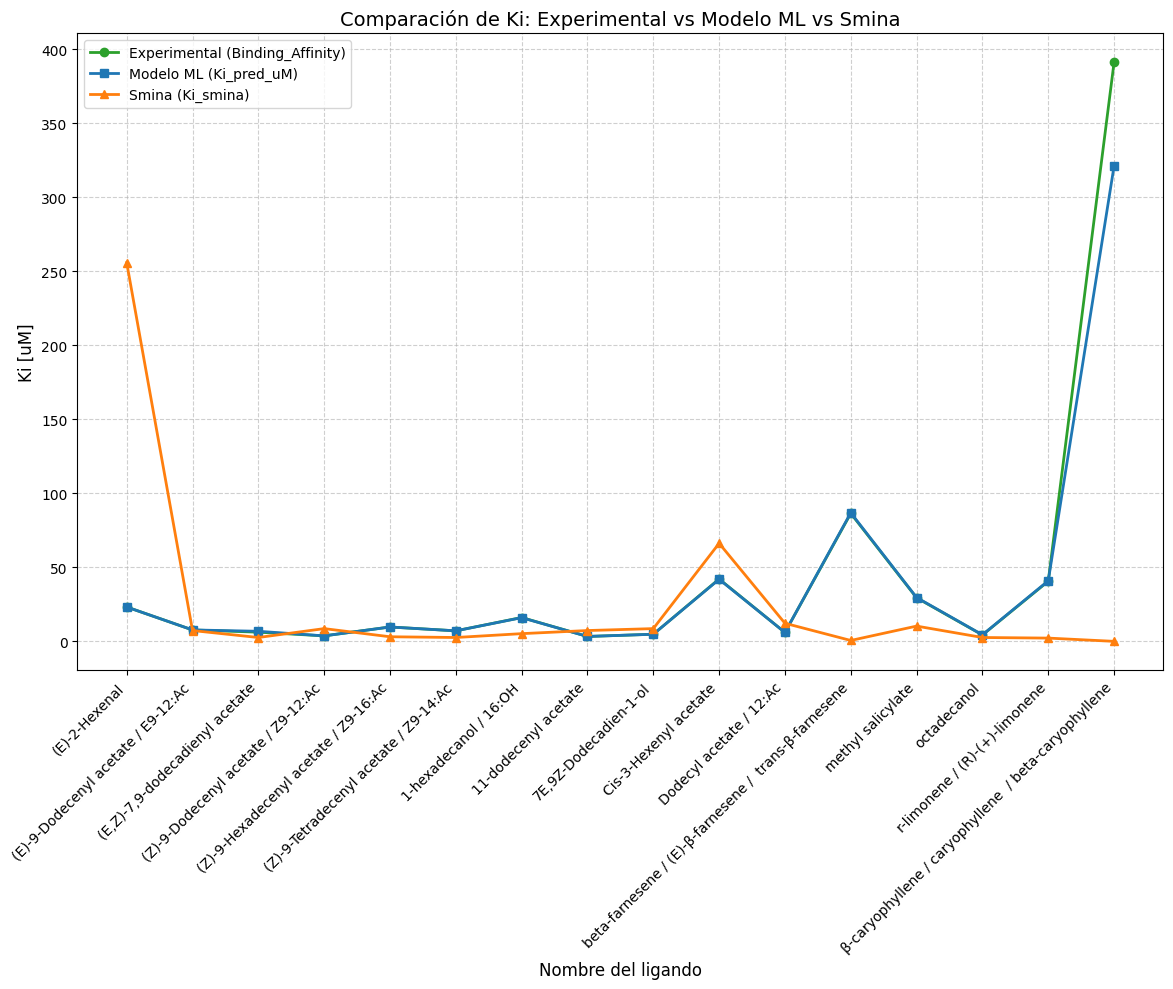

In [24]:
import matplotlib.pyplot as plt

# --- Verificamos columnas ---
for col in ['Compound name', 'Binding_Affinity', 'Ki_pred_uM', 'Ki_uM']:
    if col not in merged_df.columns:
        raise KeyError(f"Falta la columna '{col}' en merged_df")

# --- Aseguramos que Compound name sea de tipo string para etiquetas ---
merged_df['Compound name'] = merged_df['Compound name'].astype(str)

# --- Ordenamos por Compound name si es necesario ---
merged_df_sorted = merged_df.sort_values(by='Compound name')

# --- Crear gráfico de líneas ---
plt.figure(figsize=(12,10))
plt.plot(merged_df_sorted['Compound name'], merged_df_sorted['Binding_Affinity'],
         marker='o', color='tab:green', label='Experimental (Binding_Affinity)', linewidth=2)
plt.plot(merged_df_sorted['Compound name'], merged_df_sorted['Ki_pred_uM'],
         marker='s', color='tab:blue', label='Modelo ML (Ki_pred_uM)', linewidth=2)
plt.plot(merged_df_sorted['Compound name'], merged_df_sorted['Ki_uM'],
         marker='^', color='tab:orange', label='Smina (Ki_smina)', linewidth=2)

# --- Ejes y estilo ---
plt.xlabel('Nombre del ligando', fontsize=12)
plt.ylabel('Ki [uM]', fontsize=12)
plt.title('Comparación de Ki: Experimental vs Modelo ML vs Smina', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# --- Mostrar cada Compound name como etiqueta en el eje X ---
plt.xticks(ticks=range(len(merged_df_sorted['Compound name'])),
           labels=merged_df_sorted['Compound name'],
           rotation=45, ha='right')

plt.tight_layout()
plt.show()